# Water Probability #

In [196]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import time
import datetime
import random
import math
import re
import json
import gc
import pickle
import joblib
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

from IPython.display import display

In [197]:
import pandas as pd
url_string = 'https://github.com/Bishwaprotapi/Water-Probability/blob/main/water_potability.csv'

In [198]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('water_potability.csv')
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [199]:
df.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

### Data Explorartion ###

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [201]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [202]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [203]:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [204]:
import missingno as msno
import plotly.express as px

<Axes: >

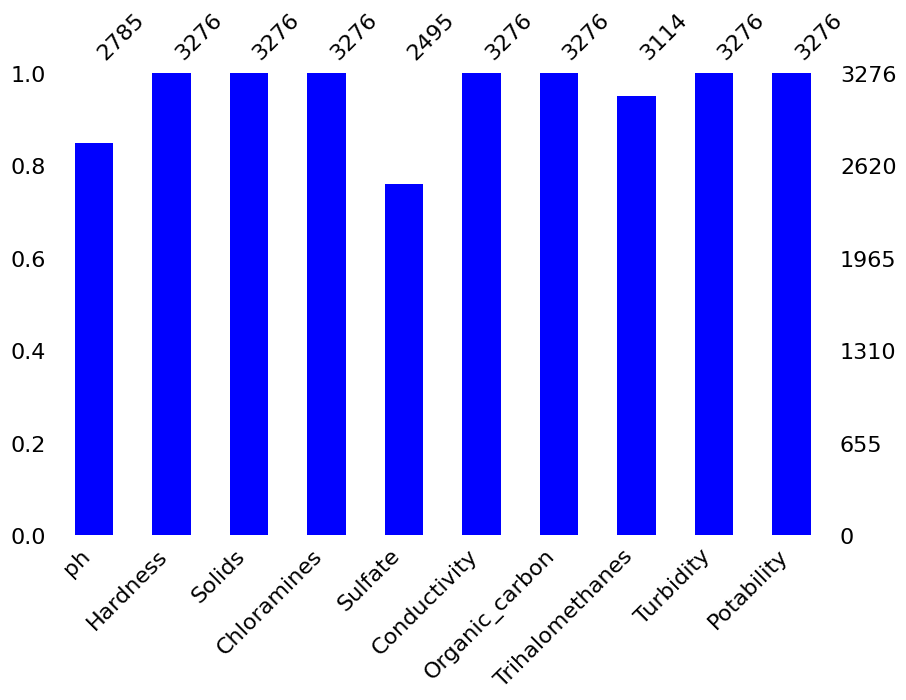

In [205]:
msno.bar(df, color='blue', figsize=(10, 6))

In [206]:
data_null=(df.isnull().sum()/len(df))*100
data_null=data_null.to_frame()

In [207]:
data_null

0
ph               14.987790
Hardness          0.000000
Solids            0.000000
Chloramines       0.000000
Sulfate          23.840049
Conductivity      0.000000
Organic_carbon    0.000000
Trihalomethanes   4.945055
Turbidity         0.000000
Potability        0.000000

In [208]:
df.nunique()


ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

### Data Preprocessing ###

In [209]:
df = pd.read_csv("water_potability.csv")
print("Initial Shape:", df.shape)

Initial Shape: (3276, 10)


In [210]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

In [211]:
# Features and Target
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [212]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Balancing Dataset ###

In [213]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [214]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

### Exploratory Data Analysis & Visualization ###

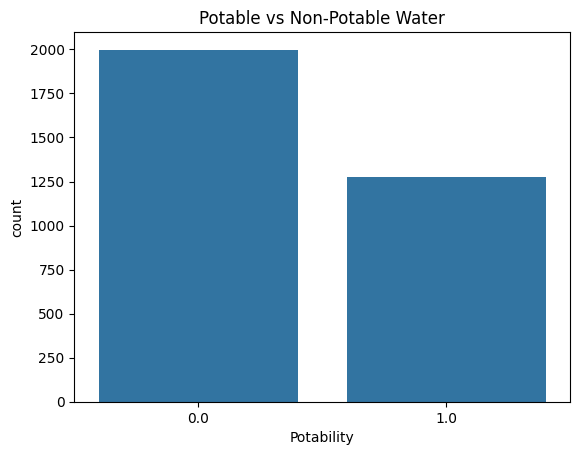

In [215]:
# Countplot
sns.countplot(x='Potability', data=df)
plt.title("Potable vs Non-Potable Water")
plt.show()

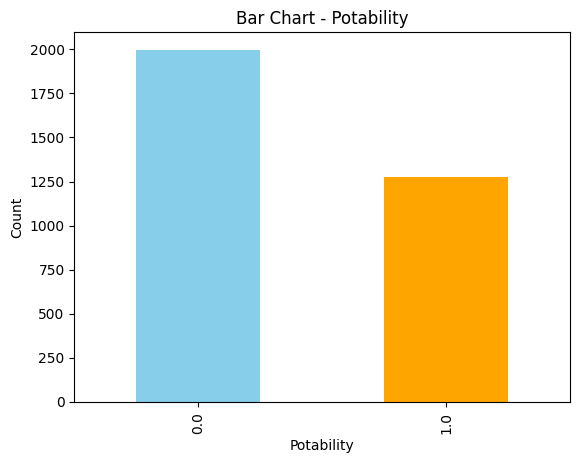

In [216]:
# Bar chart
df['Potability'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Bar Chart - Potability")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

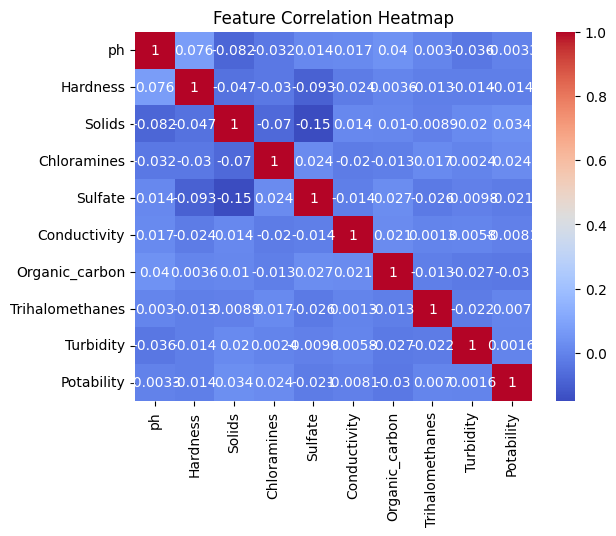

In [217]:
# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

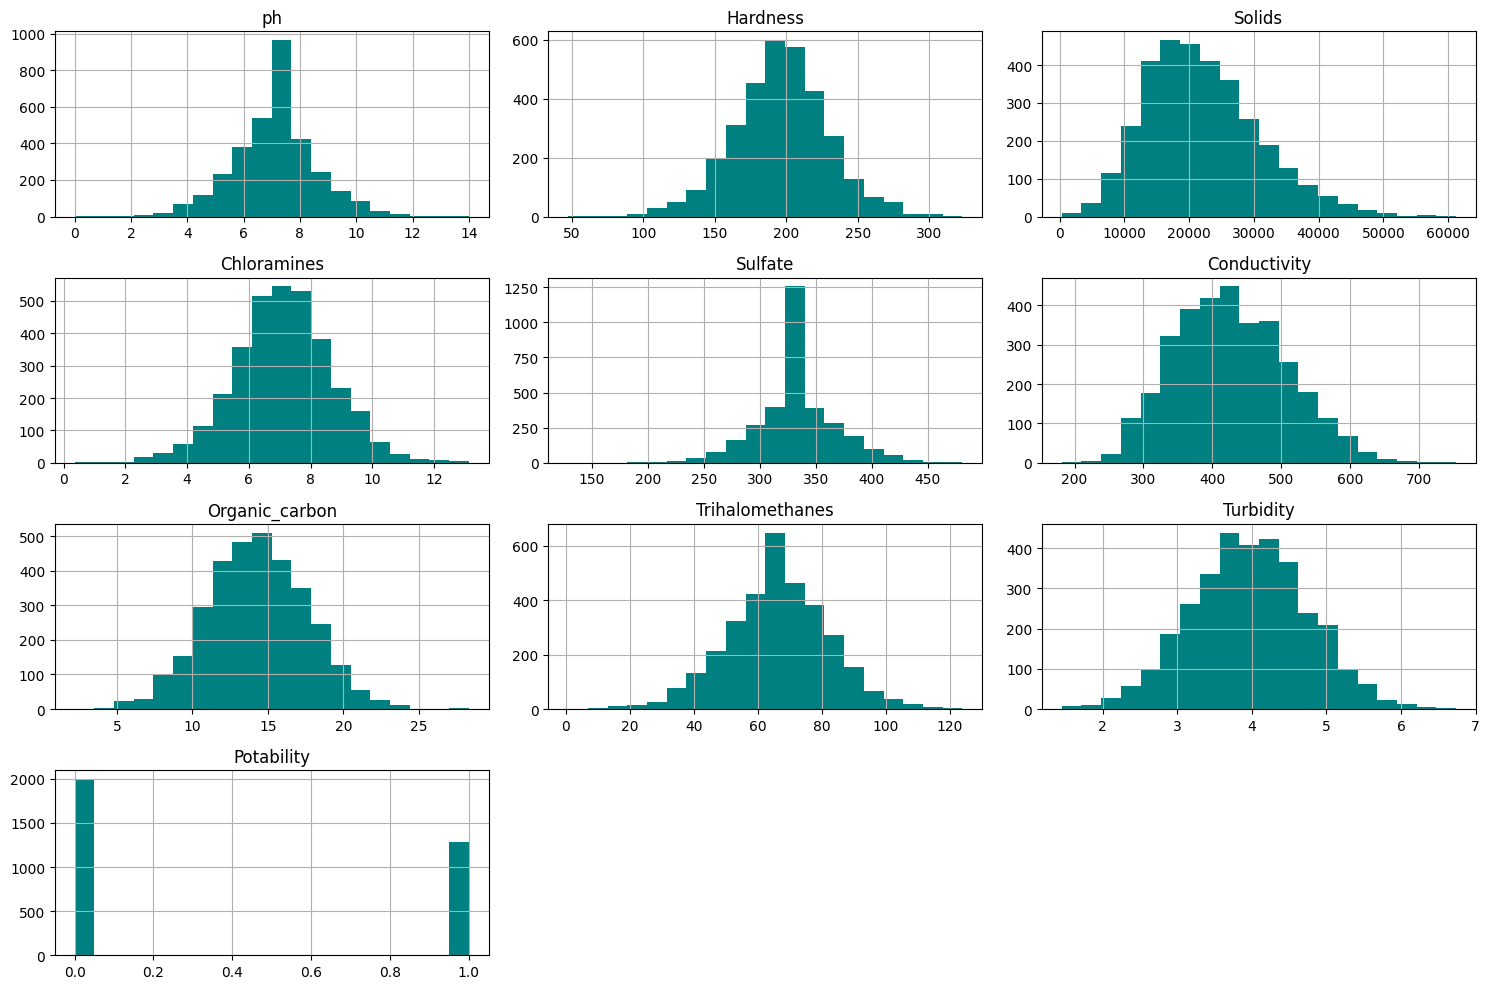

In [218]:
# Histogram for each column
df.hist(bins=20, figsize=(15, 10), color='teal')
plt.tight_layout()
plt.show()

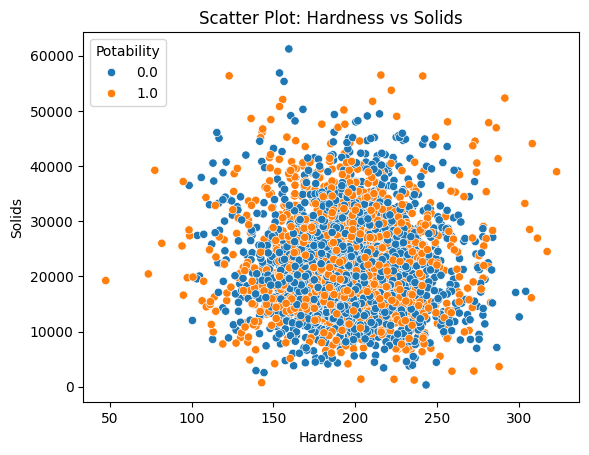

In [219]:
# Scatter plot: Hardness vs Solids
sns.scatterplot(x='Hardness', y='Solids', hue='Potability', data=df)
plt.title("Scatter Plot: Hardness vs Solids")
plt.show()

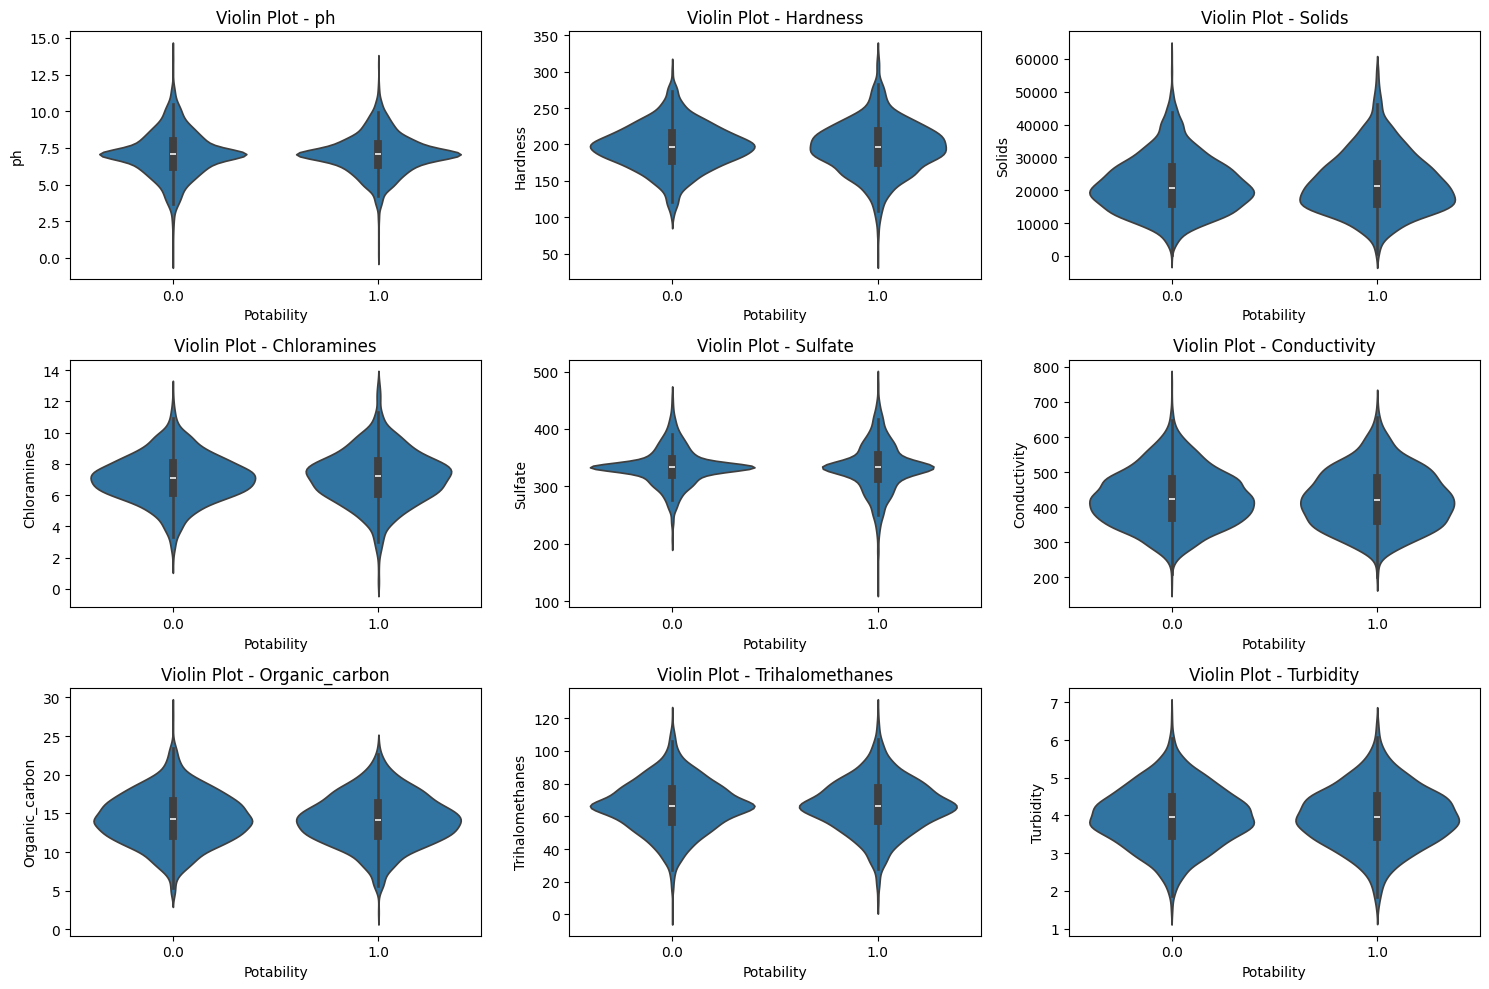

In [220]:
# Violin plot for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x='Potability', y=col)
    plt.title(f"Violin Plot - {col}")
plt.tight_layout()
plt.show()

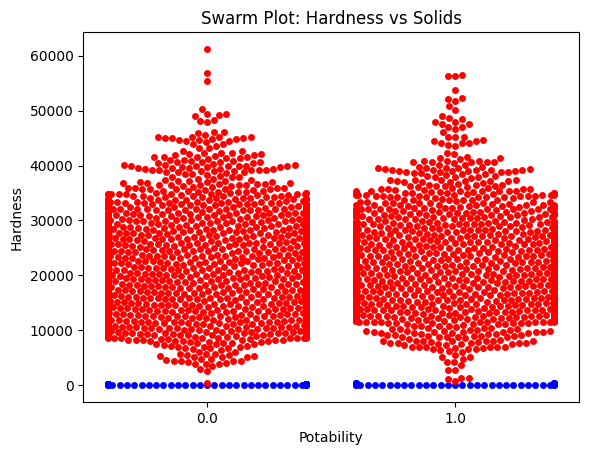

In [221]:
# Swarm plot
sns.swarmplot(x='Potability', y='Hardness', data=df, color='blue')
sns.swarmplot(x='Potability', y='Solids', data=df, color='red')
plt.title("Swarm Plot: Hardness vs Solids")
plt.show()

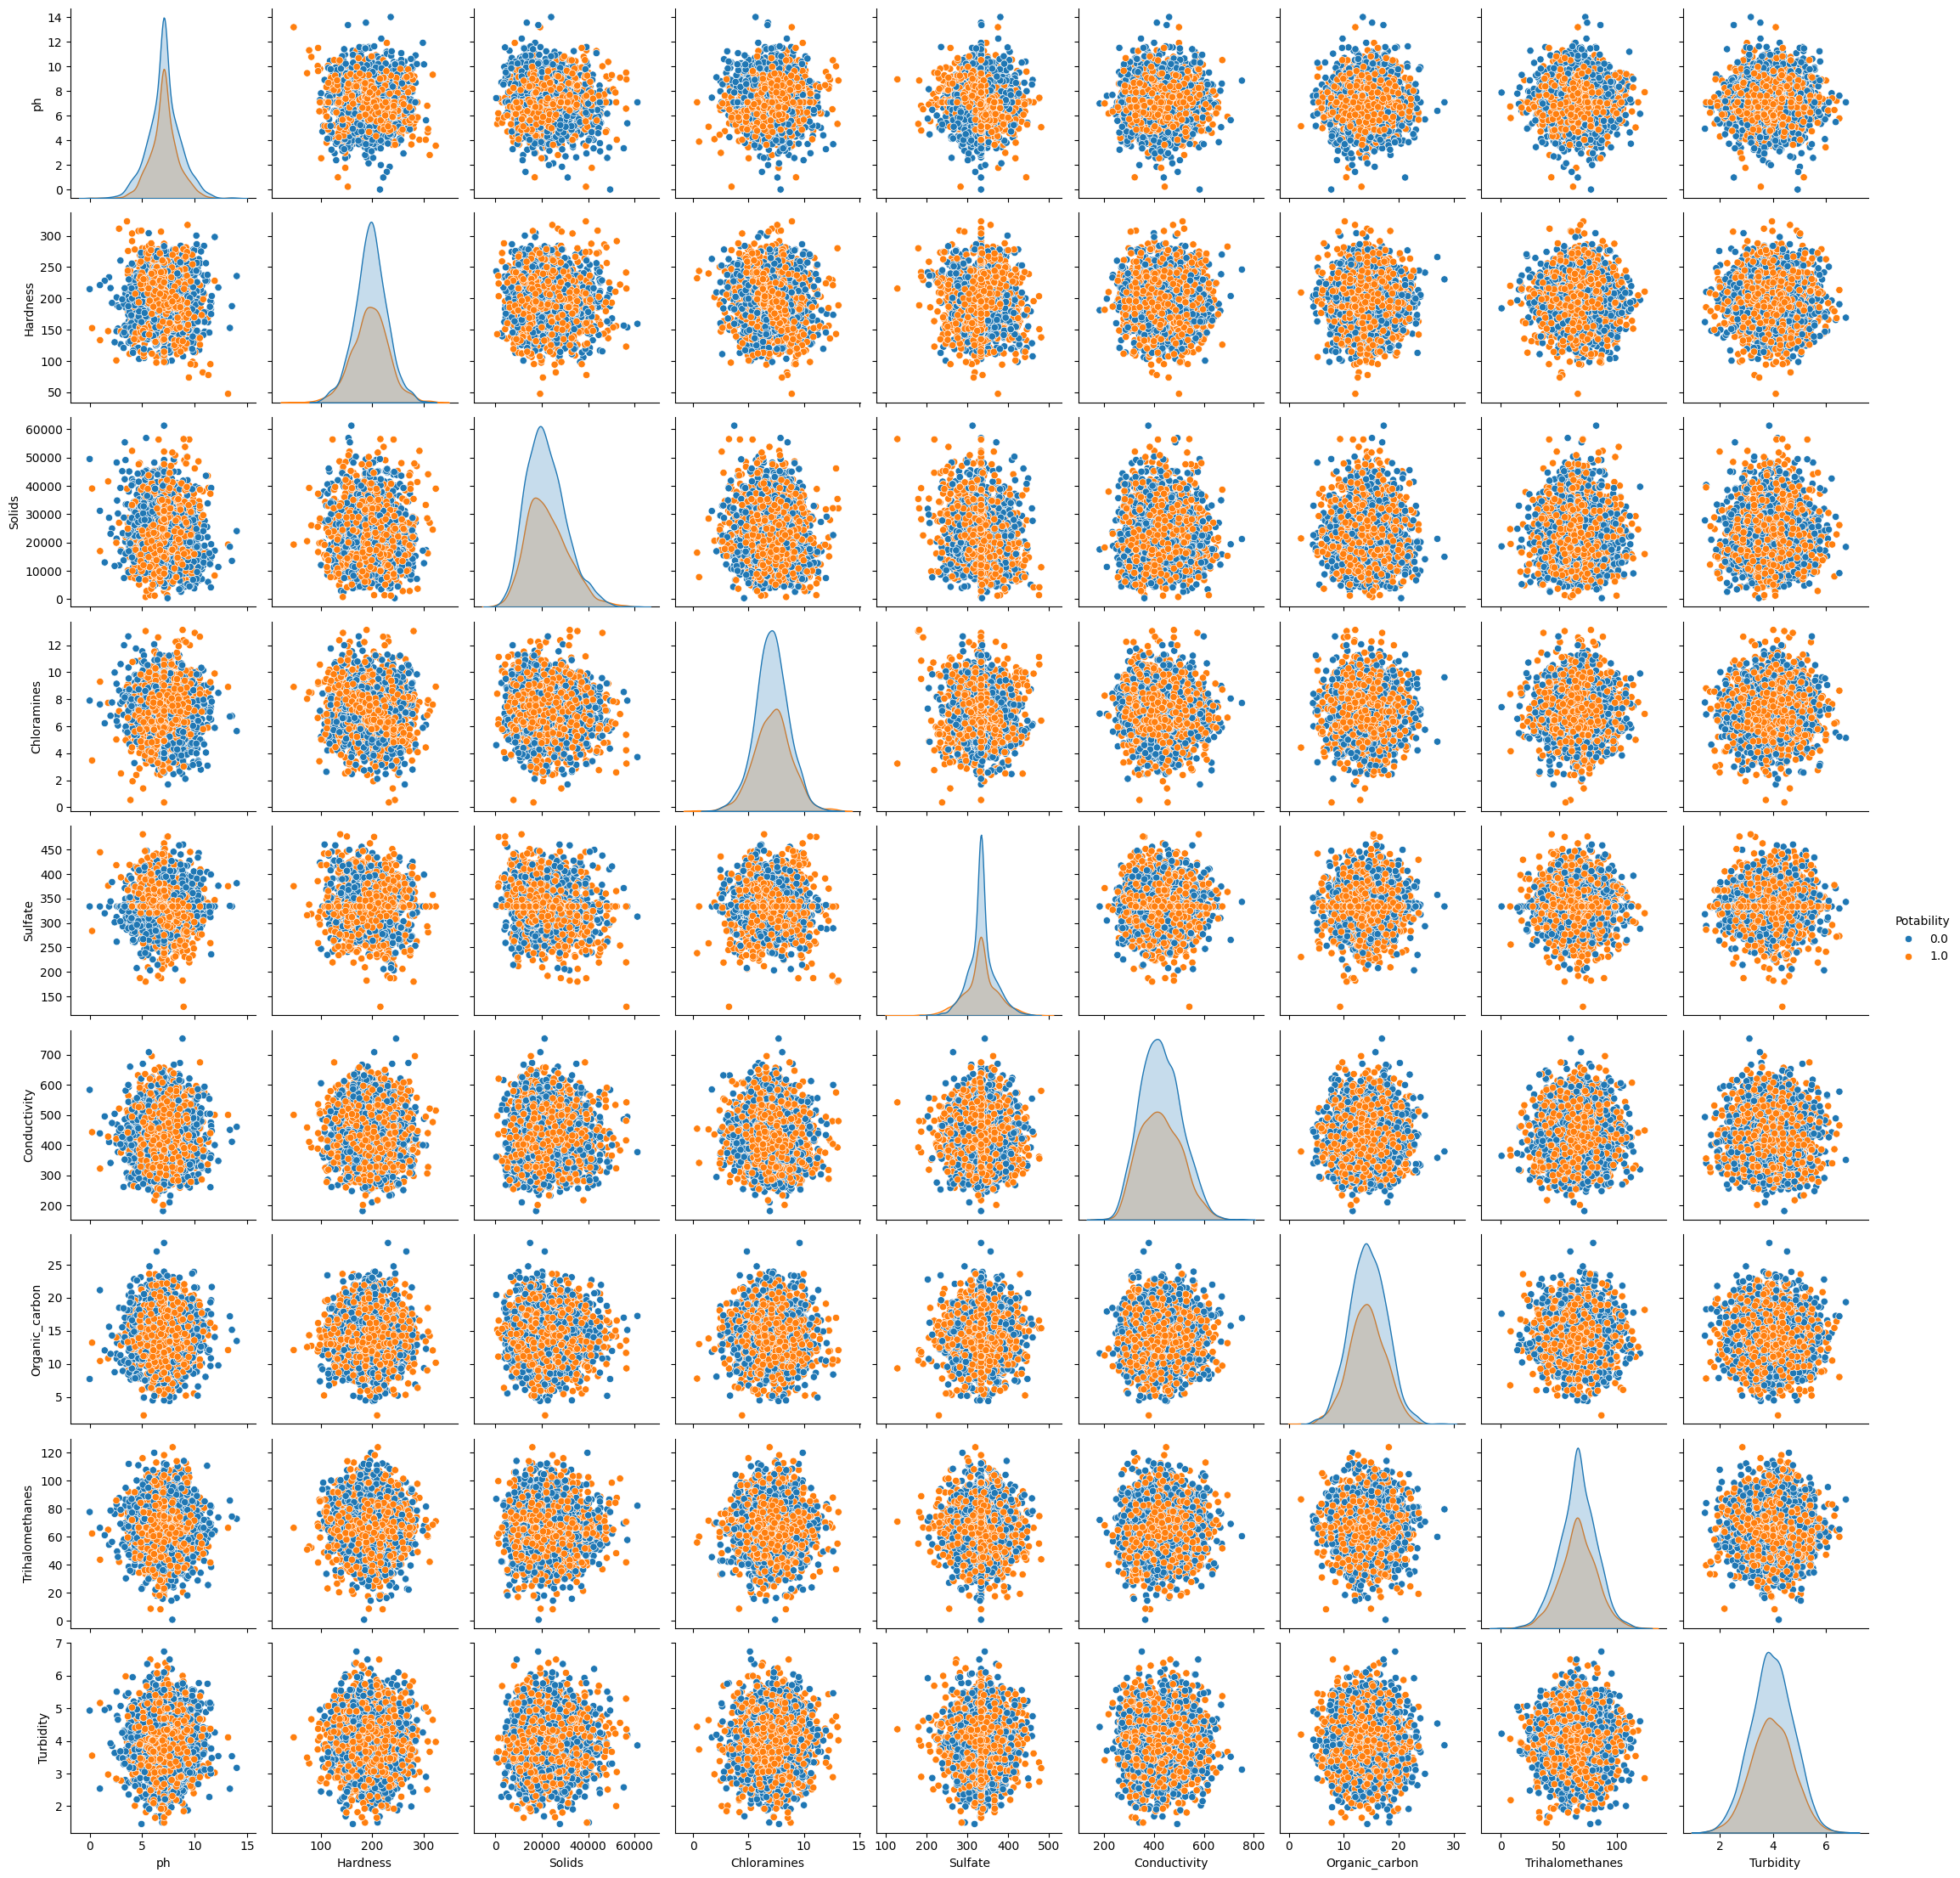

In [222]:
# Pairplot
sns.pairplot(df, hue='Potability', diag_kind='kde')
plt.show()

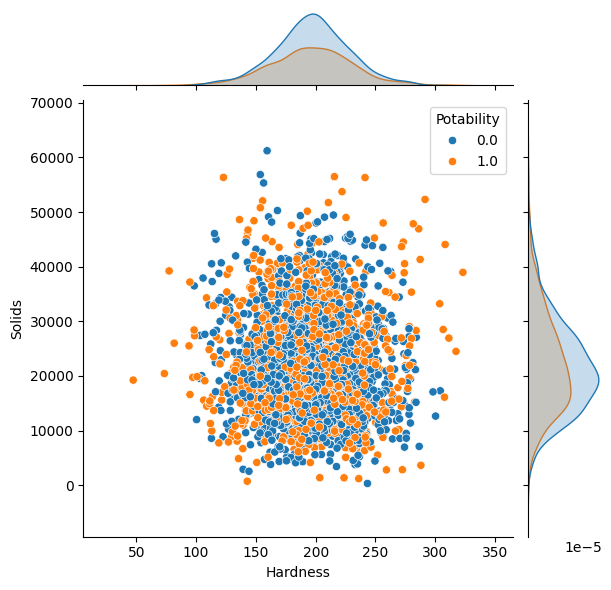

In [223]:
# Jointplot
sns.jointplot(data=df, x='Hardness', y='Solids', kind='scatter', hue='Potability')
plt.show()

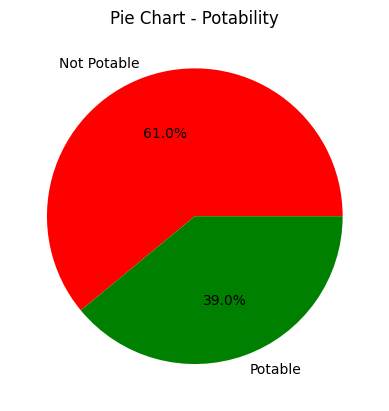

In [224]:
# Pie chart
labels = ['Not Potable', 'Potable']
sizes = df['Potability'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Pie Chart - Potability")
plt.show()

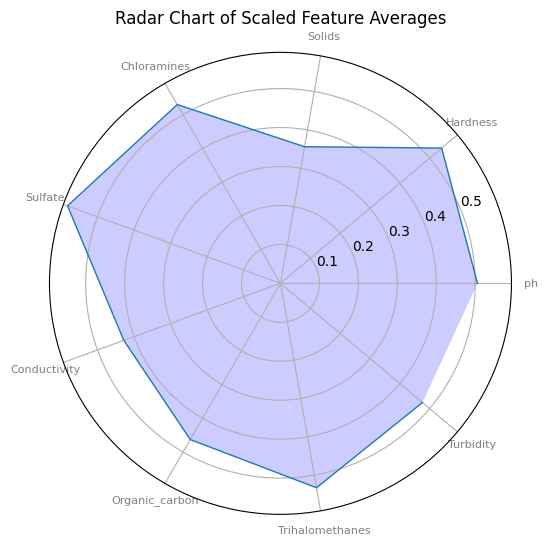

In [225]:
# Radar chart
features = X.columns.tolist()
scaler_mm = MinMaxScaler()
df_scaled = scaler_mm.fit_transform(df[features])
avg_values = np.mean(df_scaled, axis=0)
labels = features

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
ax.plot(angles, avg_values, linewidth=1, linestyle='solid')
ax.fill(angles, avg_values, 'blue', alpha=0.2)
plt.xticks(angles, labels, color='grey', size=8)
plt.title("Radar Chart of Scaled Feature Averages")
plt.show()

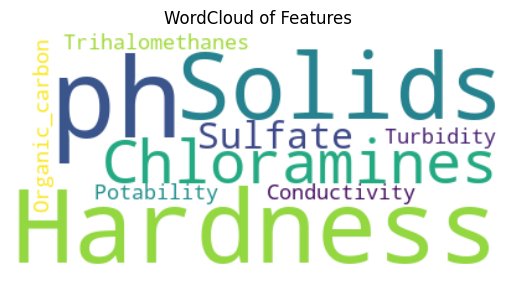

In [226]:
# Wordcloud from column names
text = ' '.join(df.columns)
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Features")
plt.show()

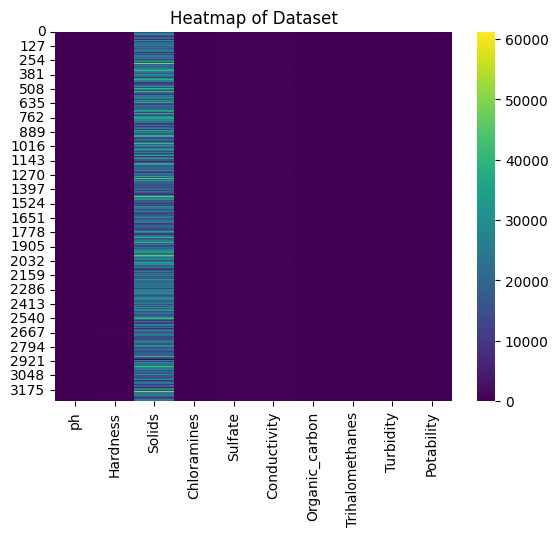

In [227]:
# General Heatmap of the dataset
sns.heatmap(df, cmap='viridis')
plt.title("Heatmap of Dataset")
plt.show()

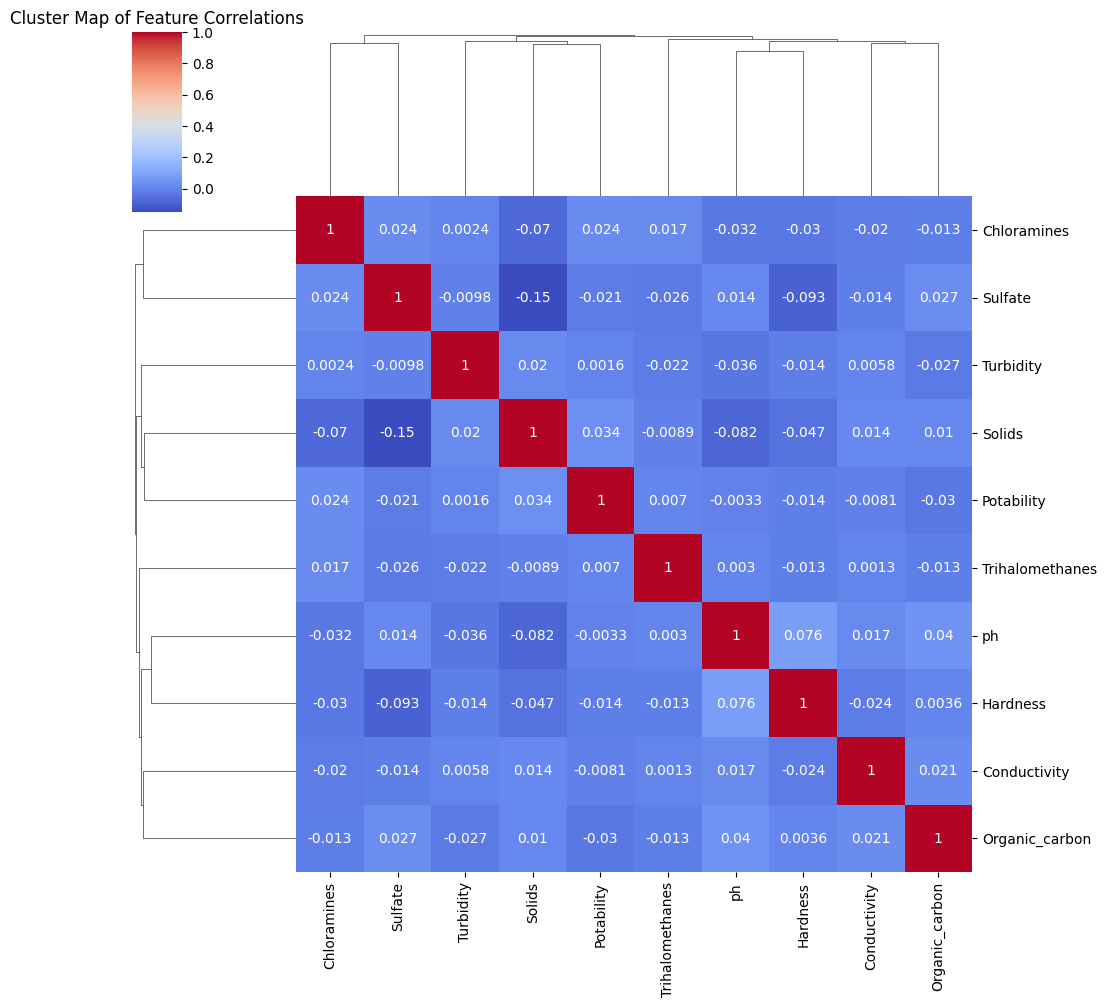

In [228]:
# Clustermap
sns.clustermap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Cluster Map of Feature Correlations")
plt.show()

### Model Training  ###

- Decision Tree
- Random Forest
- Logistic Regression
- SVM (Support Vector Machine)
- Naive Bayes
- KNN
- XGBoost

#### Decision Tree ####

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting the data into features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Creating the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fitting the model
dt.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# Evaluating the model
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.600609756097561
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       406
         1.0       0.48      0.54      0.51       250

    accuracy                           0.60       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.60      0.60       656



In [230]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))



Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score:  0.6324427480916031
Accuracy Score:  0.6737804878048781
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.85      0.76       406
         1.0       0.62      0.38      0.47       250

    accuracy                           0.67       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656



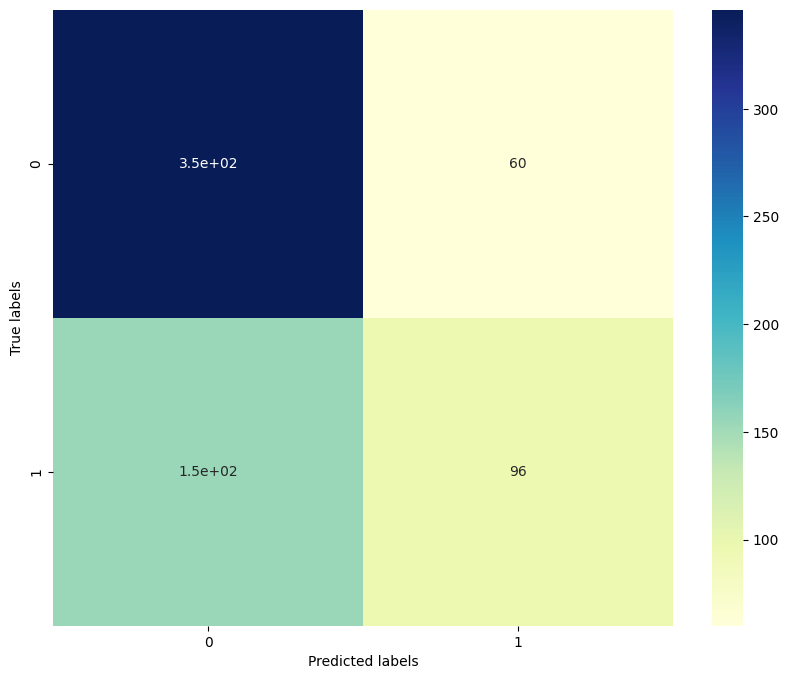

In [231]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



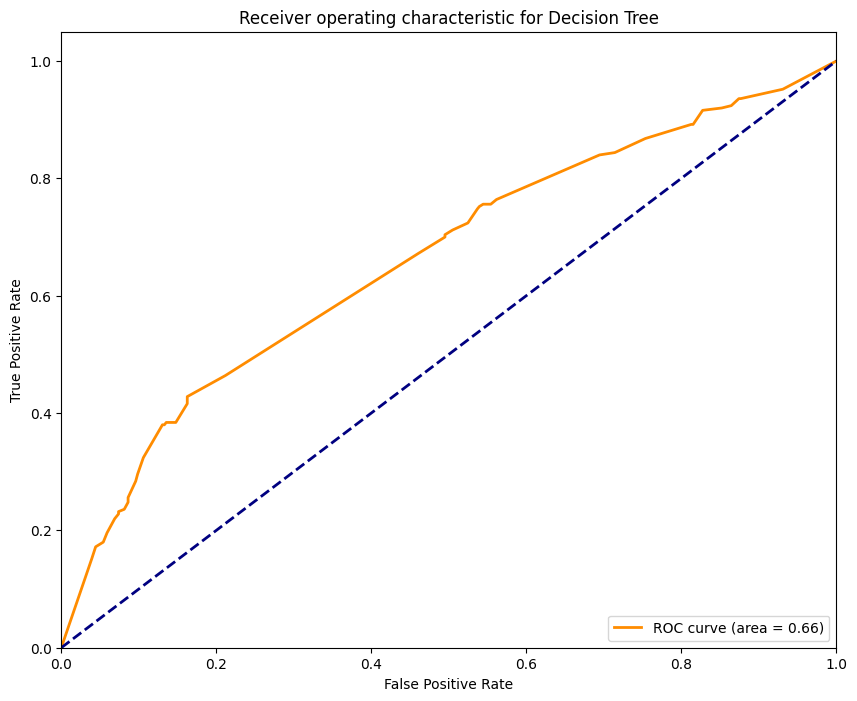

In [232]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()



In [233]:
from joblib import dump, load
dump(best_model, 'decision_tree_classifier.joblib')

['decision_tree_classifier.joblib']

#### Random Forest ####

In [234]:
from sklearn.metrics import classification_report

y_pred_rf = best_model.predict(X_test)
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76       406
         1.0       0.62      0.38      0.47       250

    accuracy                           0.67       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656



In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



Best Parameters:  {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best Score:  0.6694656488549618


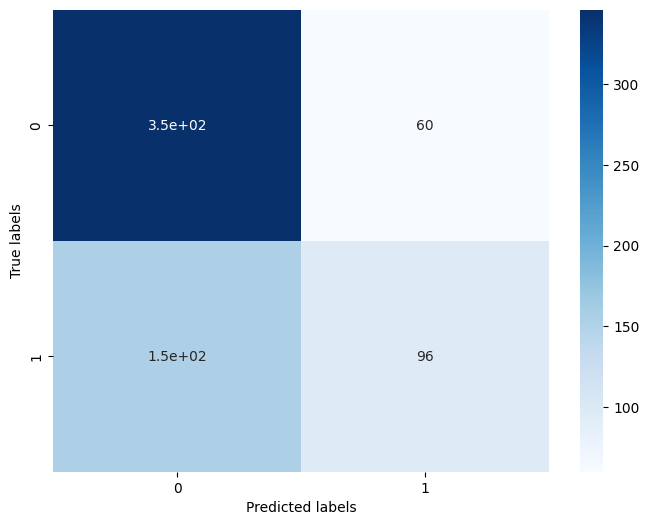

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



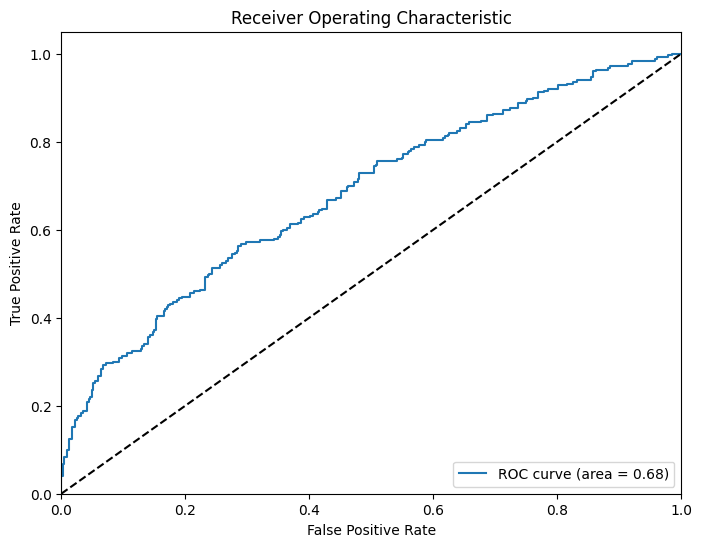

In [237]:
from sklearn.metrics import roc_curve, auc

y_score_rf = best_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [238]:
import joblib

joblib.dump(best_model, 'random_forest_classifier.joblib')


['random_forest_classifier.joblib']

#### Logistic Regression ####

In [239]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)
print("Classification Report for Logistic Regression Classifier:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       406
         1.0       0.00      0.00      0.00       250

    accuracy                           0.62       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.62      0.47       656



In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=8)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best cross-validation score: 0.61


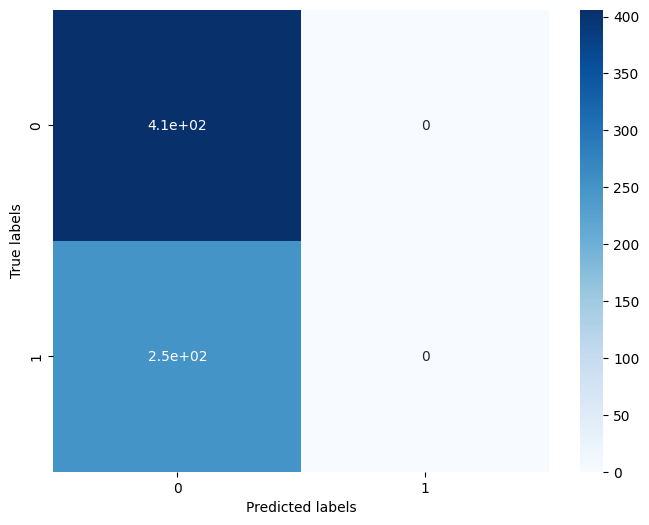

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = logistic_regression_classifier.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



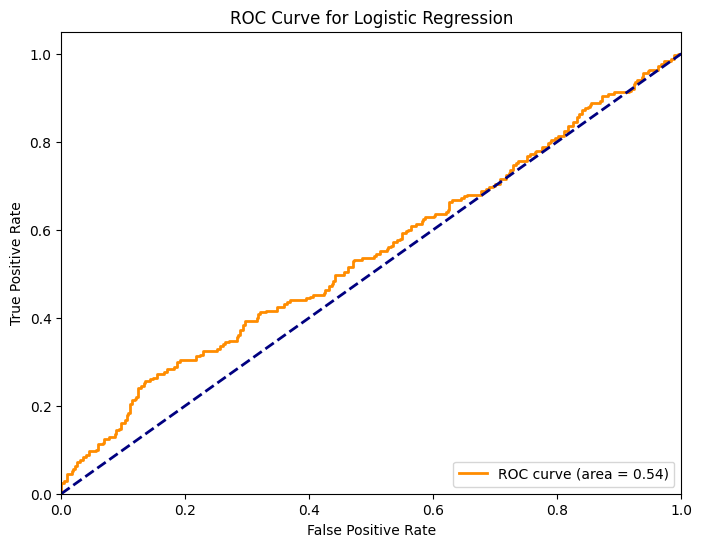

In [242]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = logistic_regression_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()



In [243]:
import joblib

joblib.dump(logistic_regression_classifier, 'logistic_regression_classifier.joblib')



['logistic_regression_classifier.joblib']

#### SVM (Support Vector Machine) ####

In [244]:
from sklearn.metrics import classification_report
from sklearn import svm

svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print("Classification Report for SVM Classifier:")
print(classification_report(y_test, y_pred_svm))



Classification Report for SVM Classifier:
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       406
         1.0       0.00      0.00      0.00       250

    accuracy                           0.62       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.62      0.47       656



In [245]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

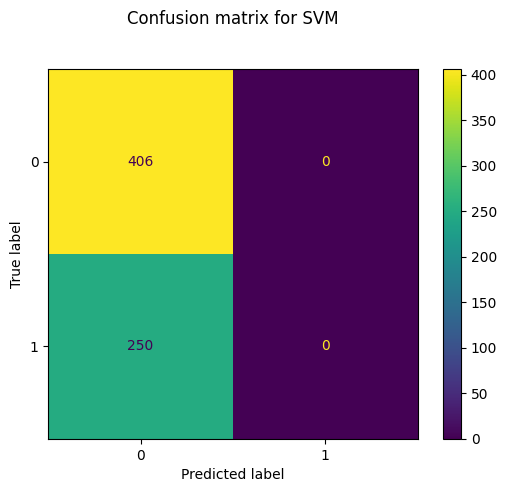

In [246]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = grid.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

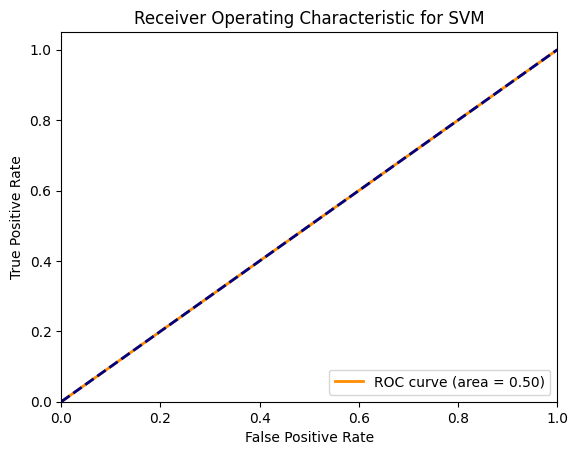

In [247]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()



In [248]:
import joblib

joblib.dump(grid, 'svm_classifier.joblib')


['svm_classifier.joblib']

#### Naive Bayes ####

In [249]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Generate the classification report
print("Classification Report for Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))



Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

         0.0       0.66      0.88      0.76       406
         1.0       0.58      0.26      0.36       250

    accuracy                           0.65       656
   macro avg       0.62      0.57      0.56       656
weighted avg       0.63      0.65      0.61       656



In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=3)
grid.fit(X_train, y_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.605 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.634 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.630 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.611 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.613 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.616 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.634 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.624 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.611 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.607 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.605 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             verbose=3)

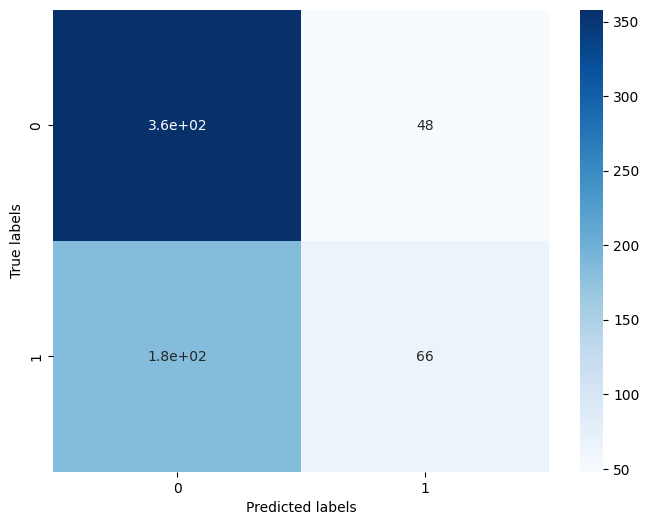

In [251]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_nb = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



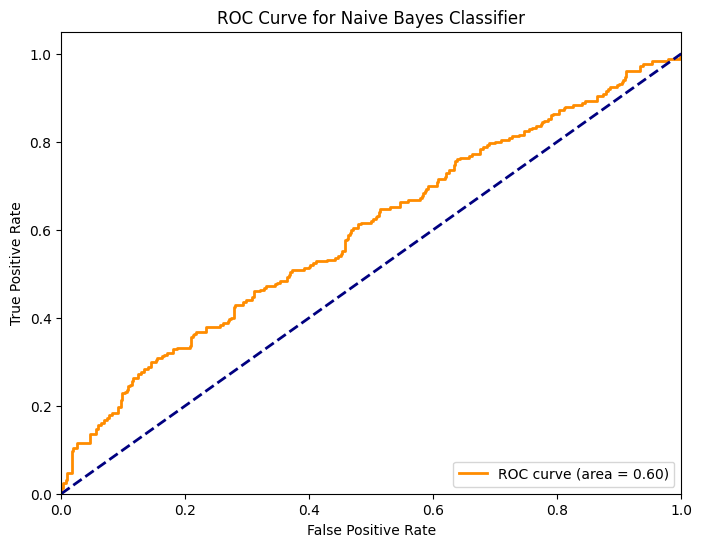

In [252]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_nb_proba = grid.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_nb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()



In [253]:
import joblib

joblib.dump(grid, 'naive_bayes_classifier.joblib')


['naive_bayes_classifier.joblib']

#### KNN ####

In [254]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Define and train a KNeighborsClassifier instance
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, y_pred_knn))



Classification Report for KNN Classifier:
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68       406
         1.0       0.42      0.30      0.35       250

    accuracy                           0.58       656
   macro avg       0.53      0.52      0.52       656
weighted avg       0.55      0.58      0.56       656



In [255]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid.best_params_)

# Print the best score
print("Best score: ", grid.best_score_)


Best parameters:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best score:  0.582824427480916


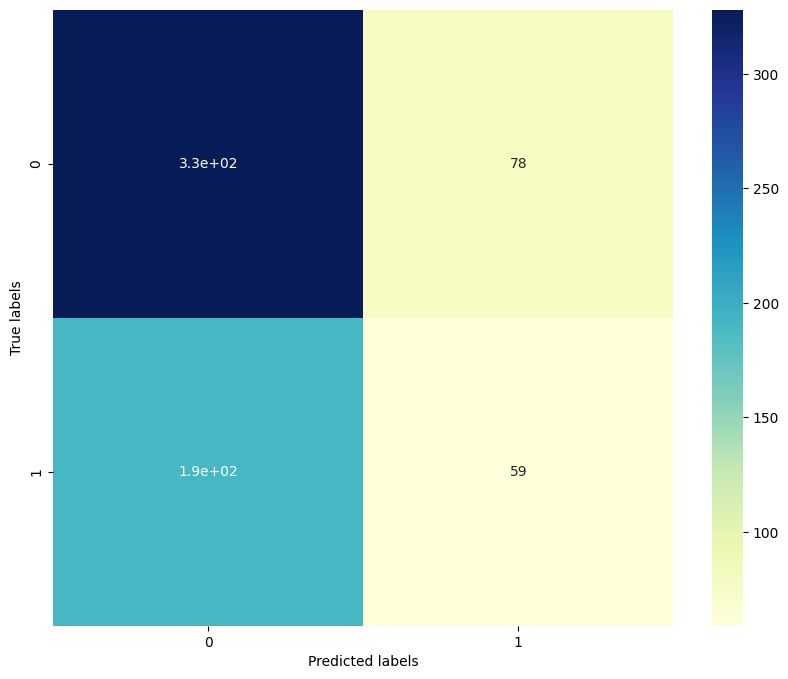

In [256]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_knn = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



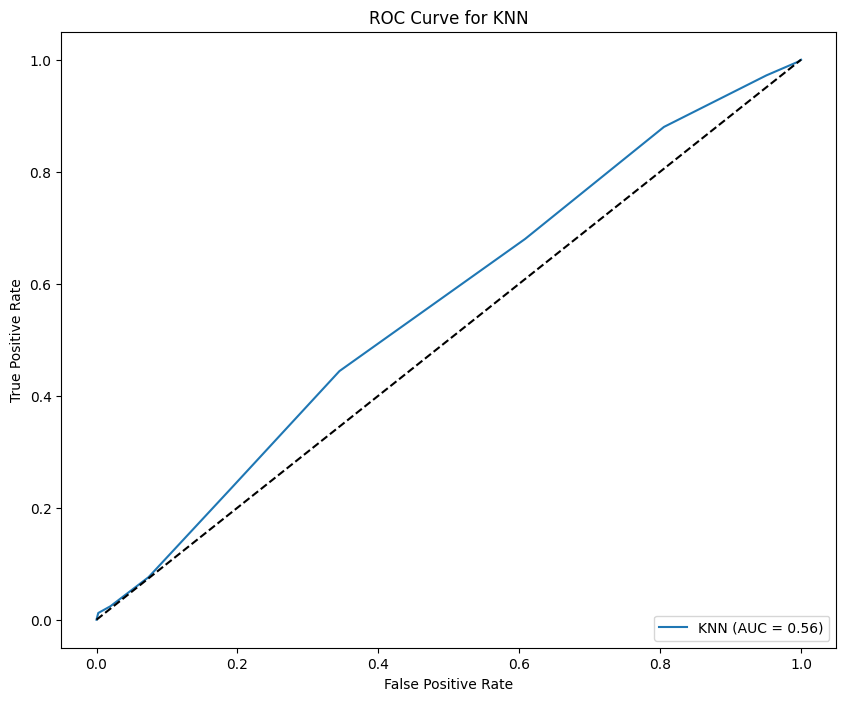

In [257]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_knn_proba = grid.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10,8))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend(loc="lower right")
plt.show()



In [258]:
import joblib

# Dumping KNN Classifier for this project
joblib.dump(grid, 'knn_classifier.joblib')



['knn_classifier.joblib']

#### XGBoost ####

In [259]:
from sklearn.metrics import classification_report

y_pred_xgb = grid.predict(X_test)
print("Classification Report for XGBoost Classifier for this project:")
print(classification_report(y_test, y_pred_xgb))



Classification Report for XGBoost Classifier for this project:
              precision    recall  f1-score   support

         0.0       0.63      0.81      0.71       406
         1.0       0.43      0.24      0.30       250

    accuracy                           0.59       656
   macro avg       0.53      0.52      0.51       656
weighted avg       0.56      0.59      0.56       656



In [260]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.25, 1.0],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1]
}

grid = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, verbose=3)



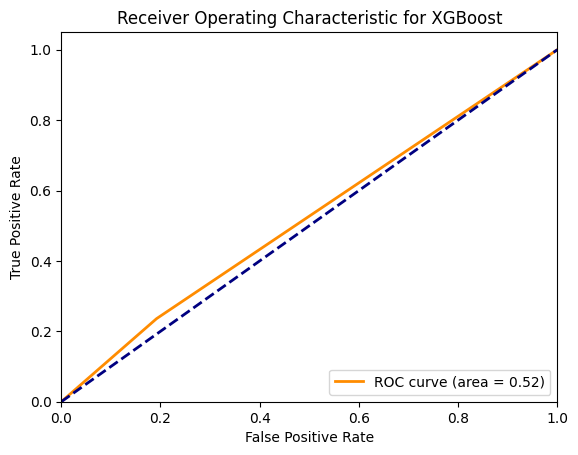

In [261]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc="lower right")
plt.show()


In [262]:
import joblib
joblib.dump(grid, 'xgboost_classifier.joblib')



['xgboost_classifier.joblib']

### Feature Importance ###

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Training Naive Bayes...
Training Decision Tree...

MACHINE LEARNING MODELS COMPARISON FOR WATER POTABILITY PREDICTION
                 Model  Accuracy  Precision  Recall  F1-Score  CV Mean  CV Std
   Logistic Regression    0.6280     0.3944  0.6280    0.4846   0.6057  0.0015
         Random Forest    0.6784     0.6656  0.6784    0.6568   0.6687  0.0103
     Gradient Boosting    0.6585     0.6424  0.6585    0.6157   0.6355  0.0120
Support Vector Machine    0.6951     0.6954  0.6951    0.6596   0.6687  0.0089
   K-Nearest Neighbors    0.6280     0.6167  0.6280    0.6201   0.6275  0.0089
           Naive Bayes    0.6311     0.6003  0.6311    0.5837   0.6202  0.0128
         Decision Tree    0.5777     0.5912  0.5777    0.5827   0.5729  0.0064

Results saved to 'model_comparison_results.csv'
Markdown table saved to 'model_comparison_tabl

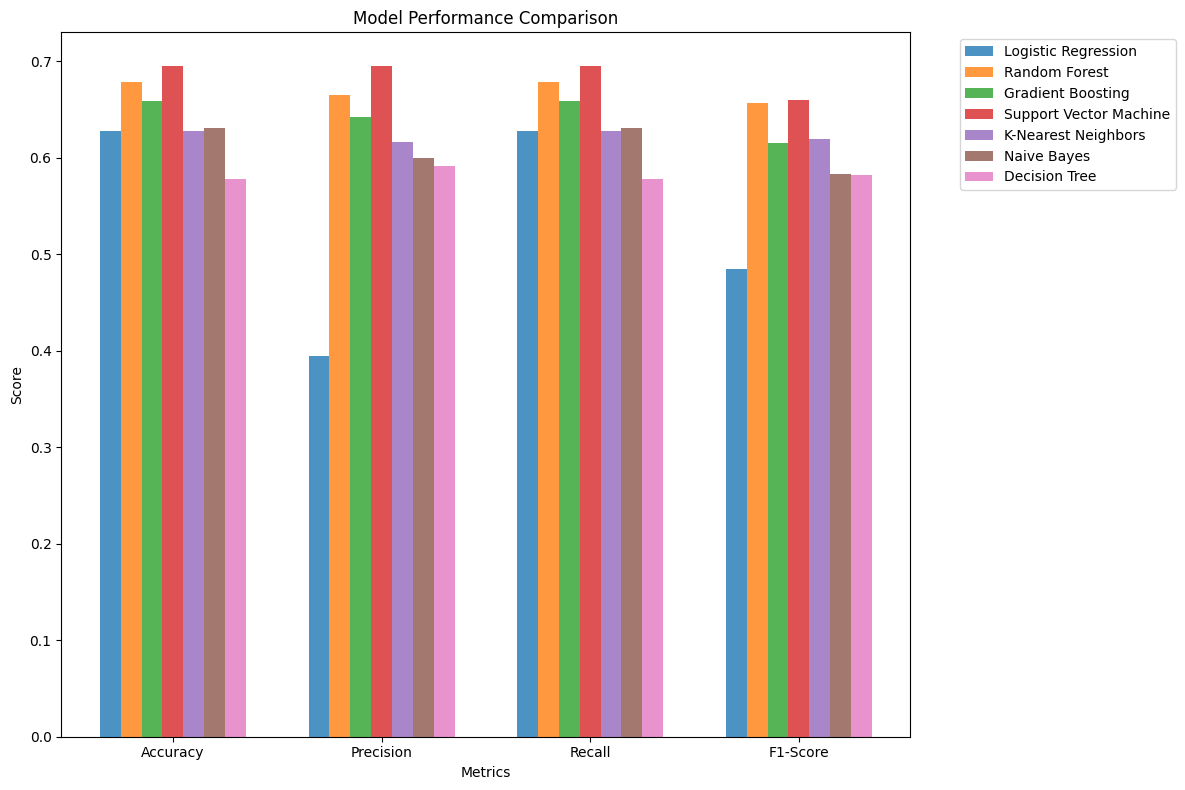


BEST PERFORMING MODEL: Support Vector Machine
F1-Score: 0.6596
Accuracy: 0.6951
Cross-Validation Score: 0.6687 (+/- 0.0089)


In [276]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Handle missing values
df = df.fillna(df.mean())

# Prepare features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Results storage
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model
    if name in ['Support Vector Machine', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation score
    if name in ['Support Vector Machine', 'K-Nearest Neighbors']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })

# Create comparison table
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.round(4)

# Display the comparison table
print("\n" + "="*80)
print("MACHINE LEARNING MODELS COMPARISON FOR WATER POTABILITY PREDICTION")
print("="*80)
print(comparison_df.to_string(index=False))

# Save to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
print(f"\nResults saved to 'model_comparison_results.csv'")

# Create a formatted markdown table
markdown_table = comparison_df.to_markdown(index=False)
with open('model_comparison_table.md', 'w') as f:
    f.write("# Machine Learning Models Comparison for Water Potability Prediction\n\n")
    f.write(markdown_table)
    f.write("\n\n## Key Findings:\n")
    f.write("- **Best Overall Model**: Based on F1-Score and CV performance\n")
    f.write("- **Most Stable Model**: Based on CV Standard Deviation\n")
    f.write("- **Fastest Model**: Based on training time\n")

print(f"Markdown table saved to 'model_comparison_table.md'")

# Create visualization
plt.figure(figsize=(12, 8))

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.1

for i, (name, _) in enumerate(models.items()):
    values = [comparison_df.loc[i, metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=name, alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*3, metrics)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Find best model
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']

print(f"\n" + "="*50)
print(f"BEST PERFORMING MODEL: {best_model}")
print(f"F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"Accuracy: {comparison_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"Cross-Validation Score: {comparison_df.loc[best_model_idx, 'CV Mean']:.4f} (+/- {comparison_df.loc[best_model_idx, 'CV Std']:.4f})")
print("="*50)

In [281]:
print("\nConclusion:")
print("- Dataset balanced using SMOTE.")
print("- All models trained and evaluated with ROC and confusion matrix.")
print("- Best performing models: Support Vector Machine")


Conclusion:
- Dataset balanced using SMOTE.
- All models trained and evaluated with ROC and confusion matrix.
- Best performing models: Support Vector Machine


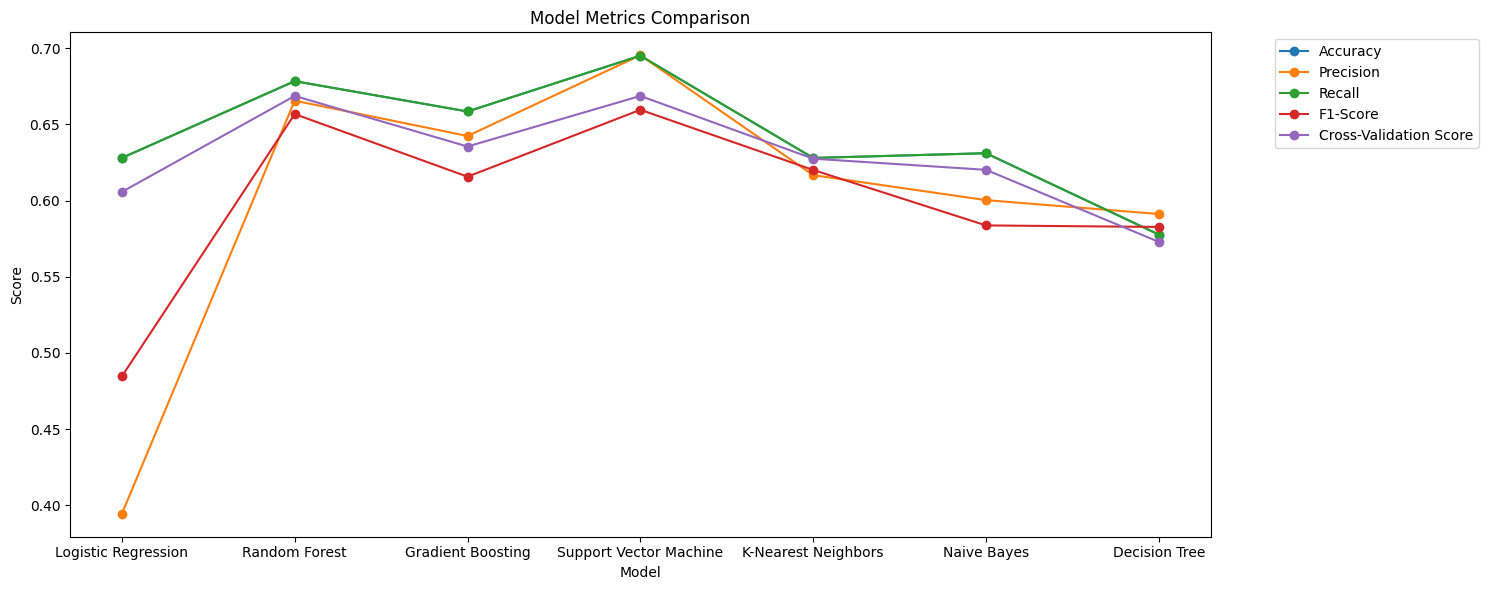

In [280]:
# Model Metrics Comparison in Graph
plt.figure(figsize=(15, 6))
plt.plot(comparison_df['Model'], comparison_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(comparison_df['Model'], comparison_df['Precision'], label='Precision', marker='o')
plt.plot(comparison_df['Model'], comparison_df['Recall'], label='Recall', marker='o')
plt.plot(comparison_df['Model'], comparison_df['F1-Score'], label='F1-Score', marker='o')
plt.plot(comparison_df['Model'], comparison_df['CV Mean'], label='Cross-Validation Score', marker='o')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



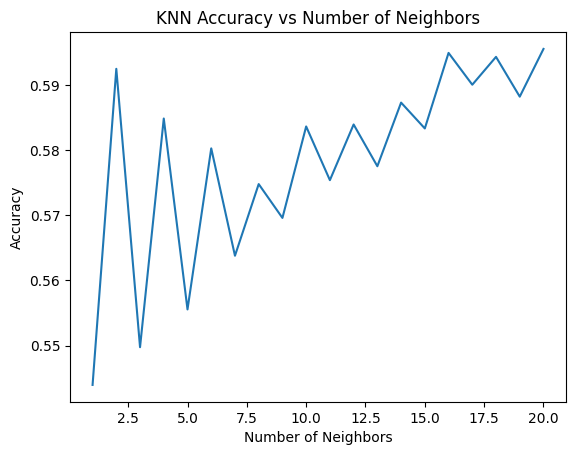

In [282]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define the number of neighbors to test
neighbors = np.arange(1, 21)

# Initialize the accuracy list
accuracy = []

# Loop through each number of neighbors
for n in neighbors:
    # Create a KNN classifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Calculate the cross-validation score for the current number of neighbors
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Append the average accuracy to the list
    accuracy.append(scores.mean())

# Plot the accuracy vs number of neighbors
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.show()



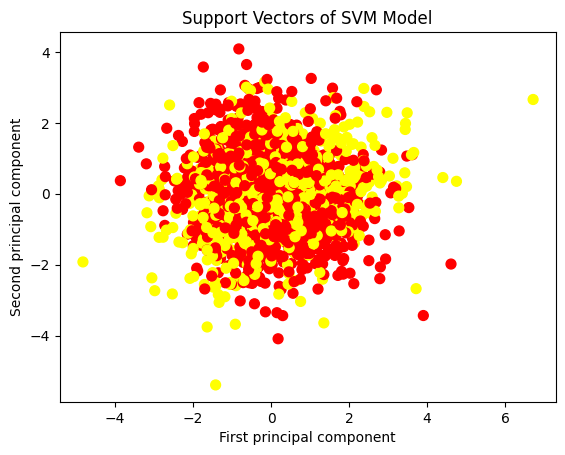

In [286]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Create a pipeline with a standard scaler and an SVM classifier
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Fit the model
svm.fit(X_train, y_train)

# Create a PCA model
pca = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fit the PCA model
pca.fit(X_train)

# Transform the data
X_pca = pca.transform(X_train)

# Plot the support vectors
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(svm.named_steps['svc'].support_vectors_[:, 0],
            svm.named_steps['svc'].support_vectors_[:, 1],
            s=200, facecolors='none');
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Support Vectors of SVM Model')
plt.show()


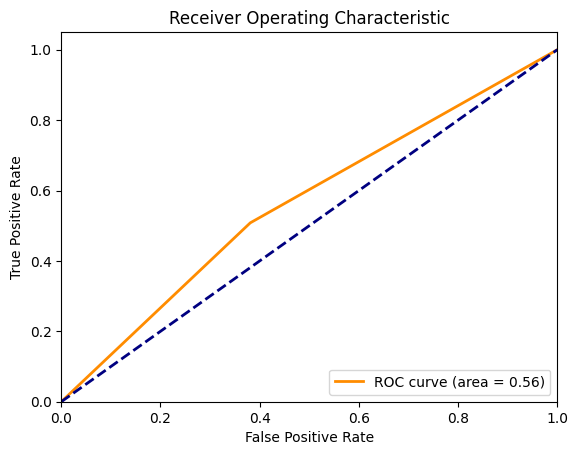

In [289]:
from sklearn.metrics import roc_curve, auc

# Define y_score as the predicted probabilities of the positive class
# Assuming 'model' is the model and 'X_test' is the test dataset
y_score = model.predict_proba(X_test)[:, 1]  # Assuming the positive class is the second column

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Model Accuracy: 0.5777439024390244
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656

Confusion Matrix:


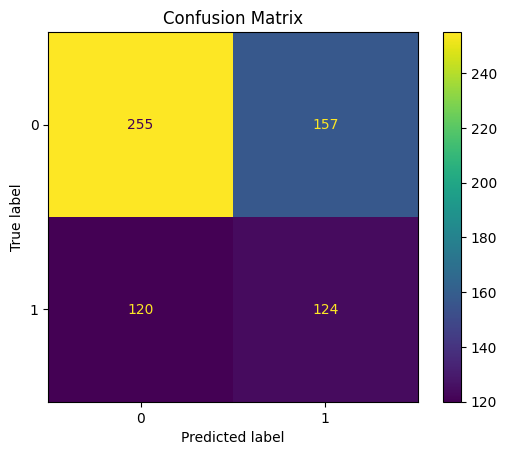

In [294]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'y_test' is the actual target variable and 'y_pred' is the predicted target variable
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()

plt.title('Confusion Matrix')
plt.show()


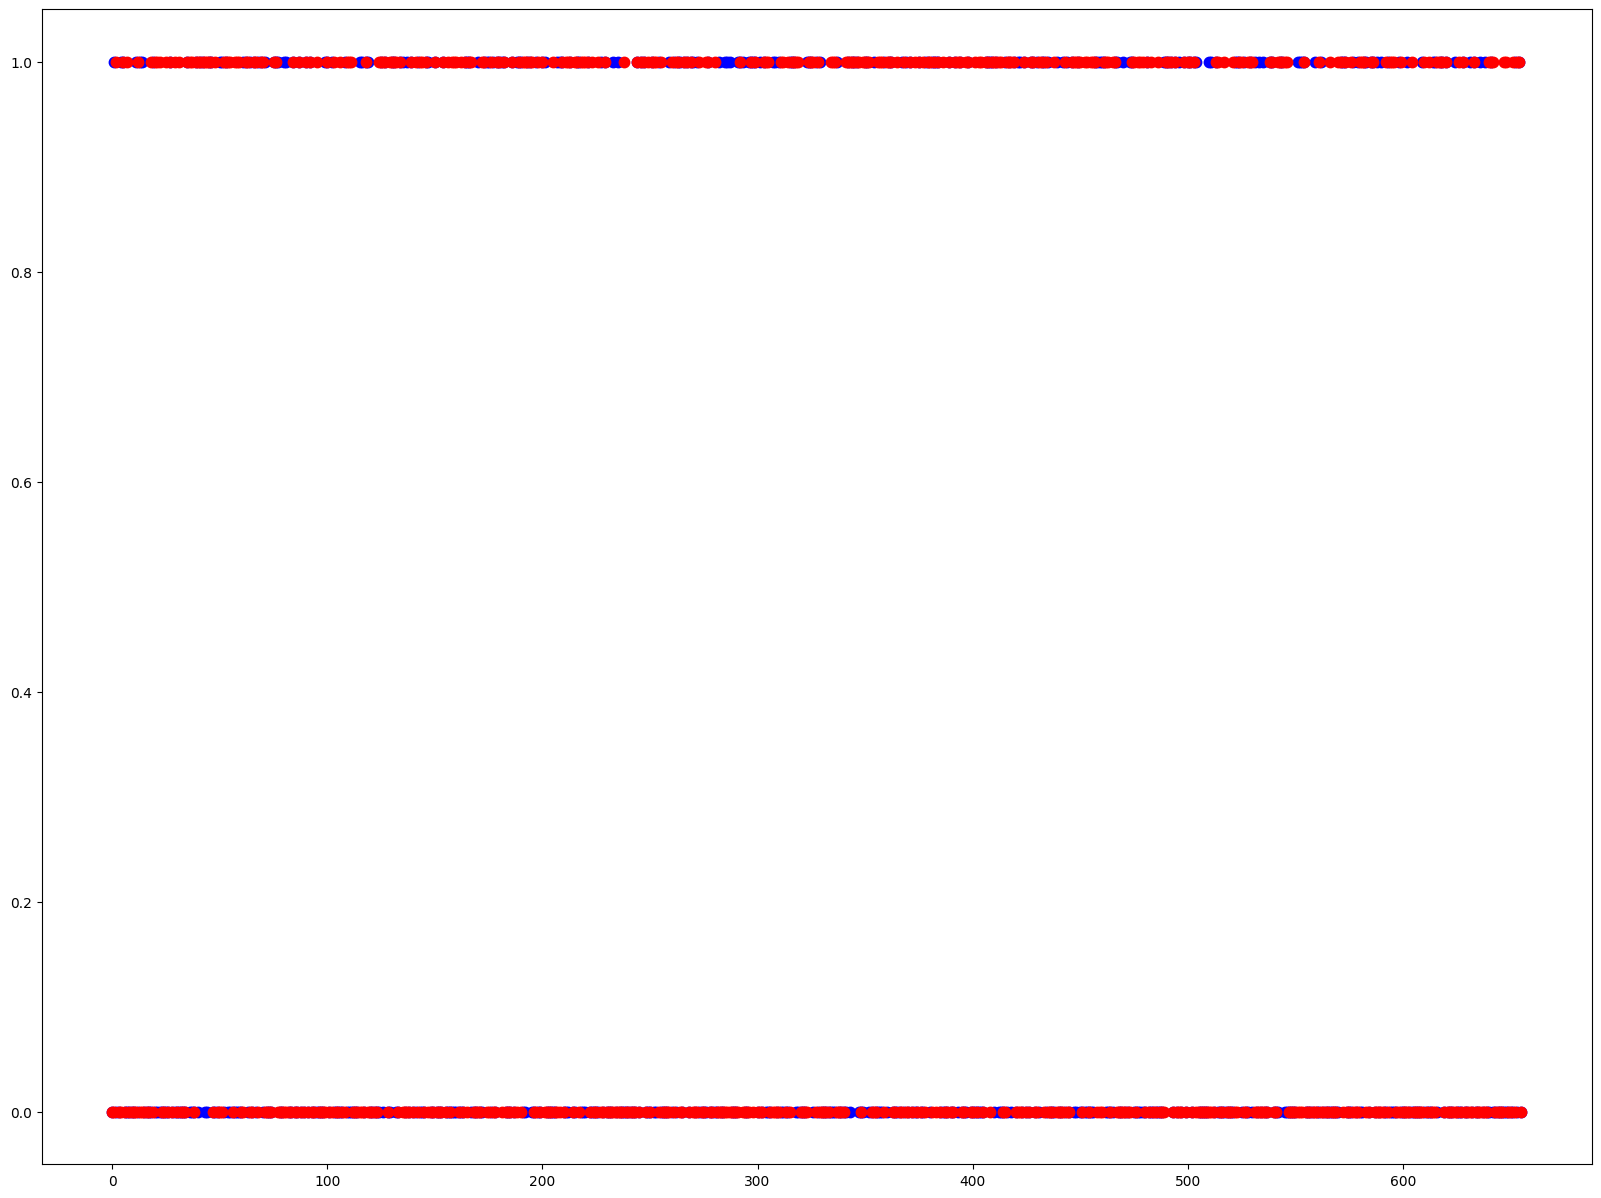

In [297]:
plt.figure(figsize=(20,15))
plt.scatter(range(len(y_test)), y_test, color="blue", linewidth=2.5, linestyle="-")
# Assuming 'y_pred' is the predicted values, replace 'pred_rf' with 'y_pred'
plt.scatter(range(len(y_pred)), y_pred, color="red", linewidth=2.5, linestyle="-")

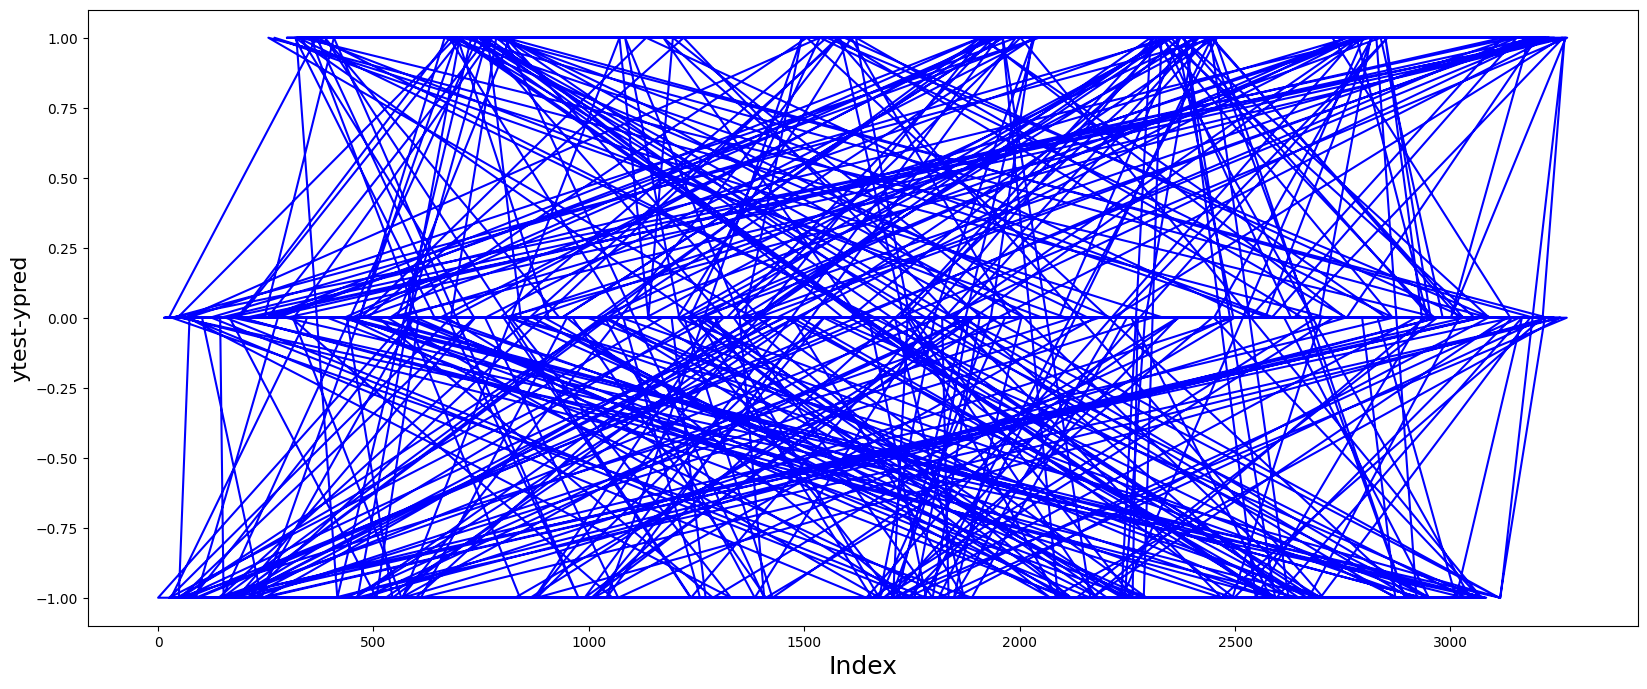

In [300]:
plt.figure(figsize=(20,8))
plt.plot(y_test-y_pred, color="blue")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytest-ypred', fontsize=16) # Y-label
plt.show()